**Exercise 1: Data Exploration and Preprocessing**

1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Load the Dataset

In [2]:
data = pd.read_csv('customer_segmentation.csv')

Data Exploration

In [3]:
print(data.head())


   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


In [4]:
print(data.isnull().sum())


CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


In [5]:
data = data.fillna(data.mean())  # Example of filling missing values


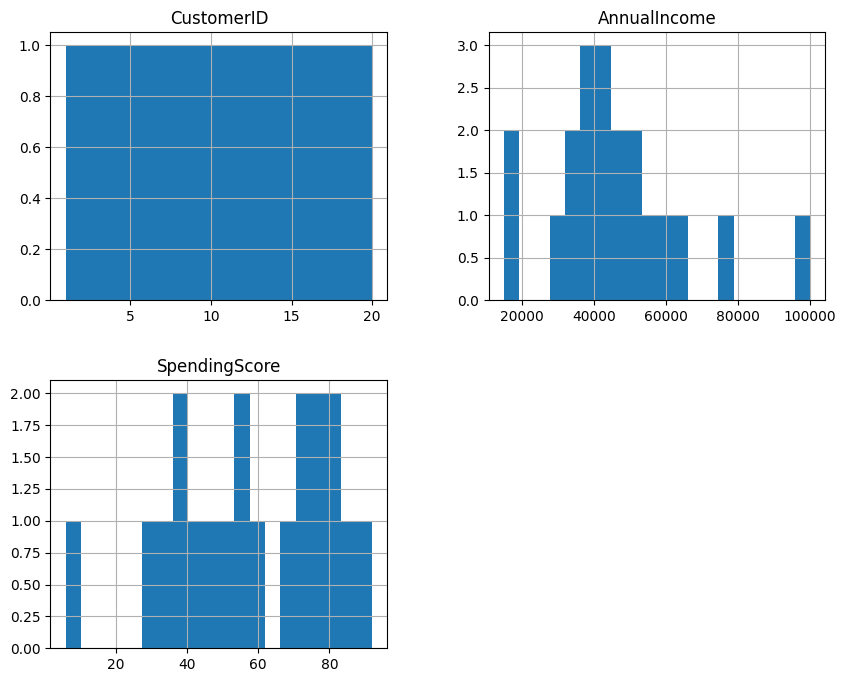

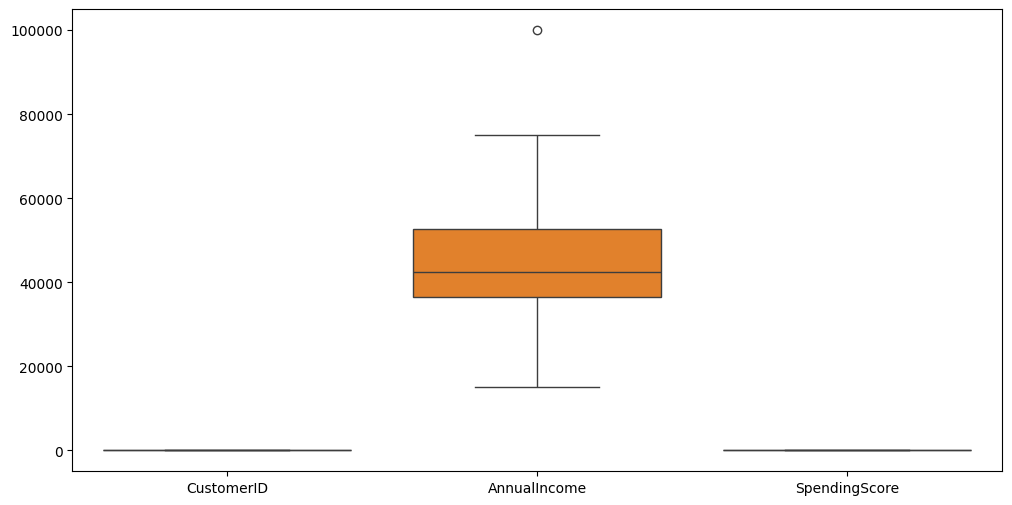

In [8]:
# Histograms
data[['CustomerID', 'AnnualIncome', 'SpendingScore']].hist(bins=20, figsize=(10, 8))
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['CustomerID', 'AnnualIncome', 'SpendingScore']])
plt.show()

Data Normalization

In [10]:
scaler = StandardScaler()
data[['CustomerID', 'AnnualIncome', 'SpendingScore']] = scaler.fit_transform(data[['CustomerID', 'AnnualIncome', 'SpendingScore']])

**Exercise 2: Implementing K-Means Clustering**

Initial Model Implementation



In [11]:
# K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['CustomerID', 'AnnualIncome', 'SpendingScore']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Choosing Optimal k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

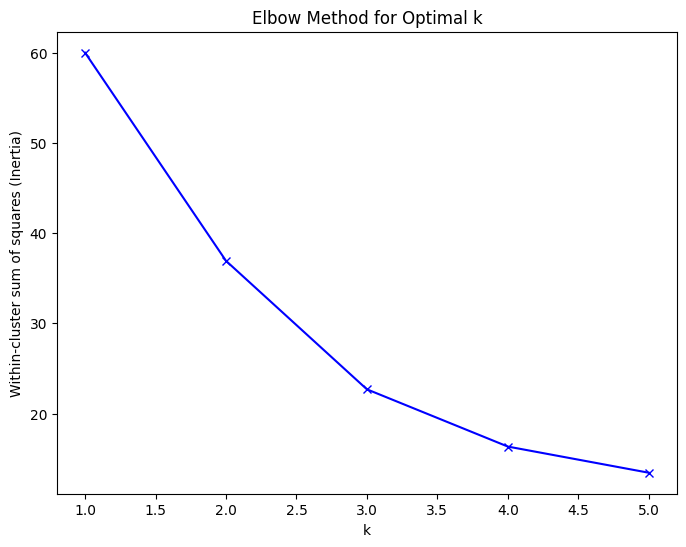

In [12]:
# Elbow Method
inertias = []
K = range(1, 6)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['CustomerID', 'AnnualIncome', 'SpendingScore']])
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

Cluster Visualization

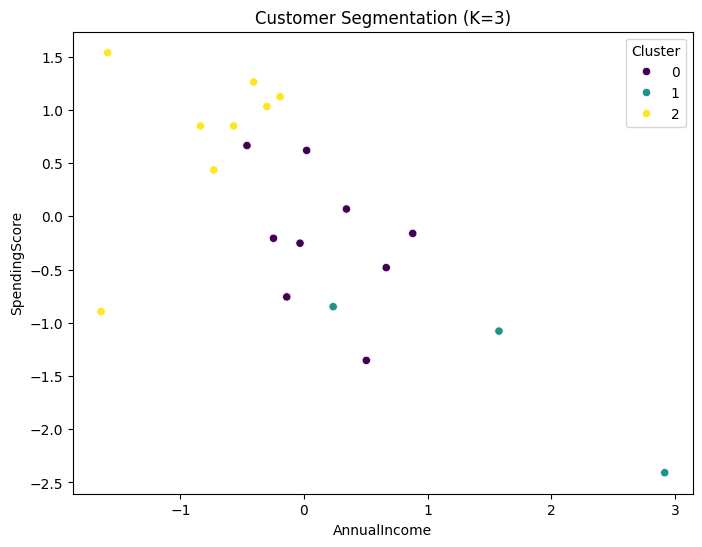

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation (K=3)')
plt.show()


**Exercise 3: Model Evaluation**

Silhouette Score



In [14]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data[['CustomerID', 'AnnualIncome', 'SpendingScore']])
    score = silhouette_score(data[['CustomerID', 'AnnualIncome', 'SpendingScore']], labels)
    print(f'For k = {k}, the silhouette score is {score}')

For k = 2, the silhouette score is 0.3229391171070571
For k = 3, the silhouette score is 0.35610788838442364
For k = 4, the silhouette score is 0.35792032475422003
For k = 5, the silhouette score is 0.28812806414997283


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Cluster Analysis To analyze cluster characteristics

In [15]:
print(data.groupby('Cluster').mean())


         CustomerID        Age  AnnualIncome  SpendingScore
Cluster                                                    
0          0.896014  37.444444      0.170435      -0.206463
1         -0.896014  48.333333      1.576821      -1.445243
2         -0.672010  29.250000     -0.783047       0.774237


# **Step 4: Interpretation and Reporting**
- **Cluster Interpretation:** Based on the mean values of Age, Annual Income, and Spending Score, you can describe each cluster. For instance:

- Cluster 0: High-income, low-spending customers.
- Cluster 1: Low-income, high-spending customers.
- Cluster 2: Mid-income, balanced spenders.
Report Summary:

**Data Exploration:** Describe the data and any preprocessing steps like handling missing values and normalizing the data.

**Optimal Number of Clusters:** Show how the Elbow Method helped determine the best k for K-Means (including plots).
Cluster Characteristics: Provide insights into the different customer segments.

**Visualizations:** Include histograms, box plots, Elbow Method plots, silhouette score results, and 2D scatter plots.